# Условые для заданий

В данном задании на основании 3 таблиц требуется составить SQL запросы по заданиями
которые находяться под таблицами. Задача написать самые оптимальные запросы, то
есть с минимальным количеством подзапросов, но главное правильный результат
запросов.

## Структура таблиц

### Main_data - основные данные

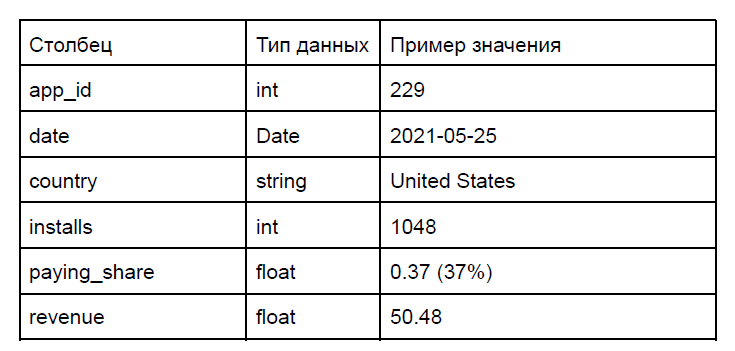

app_id - идентификатор приложения

date - дата установки приложения пользователем

country - страна пользователя

installs - количество установок за день в данной когорте

paying_share - доля пользователей которые совершили покупку от установивших в данной
когорте

revenue - доход с данной когорты

### Countries - таблица ISO кодов стран, по всем их возможным названиям

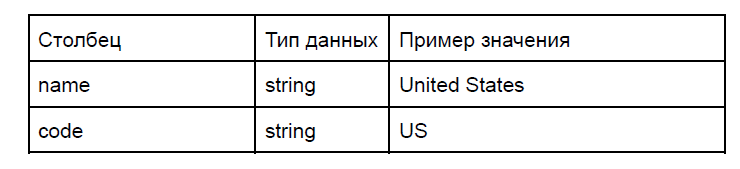

name - Полное имя страны (все возможные)

code - Двухбуквенный код страны

### Apps - Словарь приложений

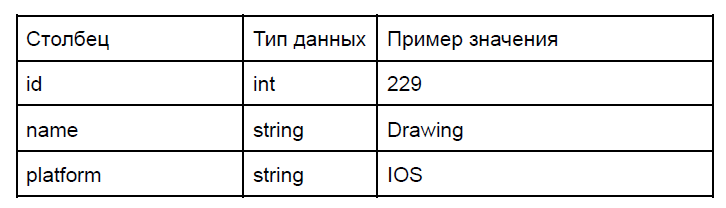

Id - идентификатор приложения

Name - имя приложения (может иметь не уникальные значения)

Platform - платформа распространения приложения

# Початковий вигляд таблиць

### Main_data - основные данные

In [12]:
CREATE TABLE main (app_id INTEGER,
                   date DATE,
                   country VARCHAR(50),
                   installs INTEGER,
                   paying_share FLOAT,
                   revenue FLOAT);
                   
INSERT INTO main VALUES (229, '2021-05-25', 'United States', 1048, 0.37, 50.48);
INSERT INTO main VALUES (230, '2021-05-31', 'Russia', 1058, 0.47, 55.56);
INSERT INTO main VALUES (231, '2021-06-02', 'Ukraine', 1068, 0.57, 89.84);
INSERT INTO main VALUES (232, '2021-06-09', 'United States', 1078, 0.67, 21.14);
INSERT INTO main VALUES (233, '2021-06-16', 'Russia', 1088, 0.77, 95.62);
INSERT INTO main VALUES (226, '2021-06-23', 'Ukraine', 1098, 0.87, 85.62);
INSERT INTO main VALUES (235, '2021-06-30', 'United States', 1108, 0.97, 74.95);
INSERT INTO main VALUES (236, '2021-07-06', 'Russia', 1118, 1.07, 74.95);
INSERT INTO main VALUES (274, '2021-07-13', 'Ukraine', 1128, 1.17, 75.96);
INSERT INTO main VALUES (237, '2021-07-25', 'Brazil', 1136, 1.21, 85.96);
INSERT INTO main VALUES (237, '2021-04-01', 'Belarus', 1256, 1.37, 34.95);
INSERT INTO main VALUES (237, '2021-08-05', 'Ukraine', 1128, 1.17, 75.96);
INSERT INTO main VALUES (397, '2021-07-04', 'Brazil', 15000, 1.59, 100.21);
INSERT INTO main VALUES (321, '2021-07-04', 'Russia', 1321, 1.64, 100.21);
INSERT INTO main VALUES (704, '2021-06-04', 'United States', 4254, 2.54, 195.6);
INSERT INTO main VALUES (568, '2021-04-04', 'Germany', 689, 2.98, 85.98);


SELECT *
FROM main
ORDER BY app_id, date, country;

SyntaxError: invalid syntax (<ipython-input-12-0285d9575a98>, line 1)

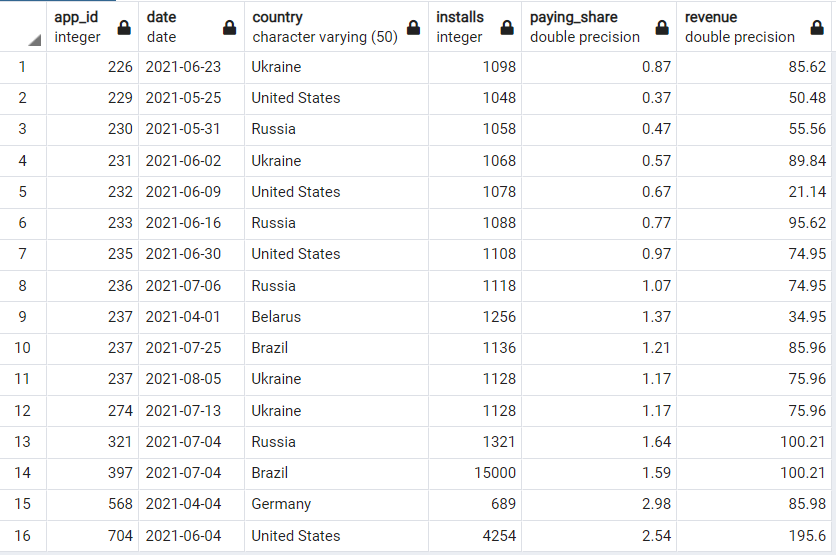

### Countries - таблица ISO кодов стран, по всем их возможным названиям

In [13]:
CREATE TABLE countries (name VARCHAR(100), code VARCHAR(10));
                   
INSERT INTO countries VALUES ('United States', 'US');
INSERT INTO countries VALUES ('Russia', 'RU');
INSERT INTO countries VALUES ('Ukraine', 'UA');
INSERT INTO countries VALUES ('Brazil', 'BR');
INSERT INTO countries VALUES ('Belarus', 'BY');
INSERT INTO countries VALUES ('Germany', 'DE');


SELECT *
FROM countries;

SyntaxError: invalid syntax (<ipython-input-13-45a8f86e0feb>, line 1)

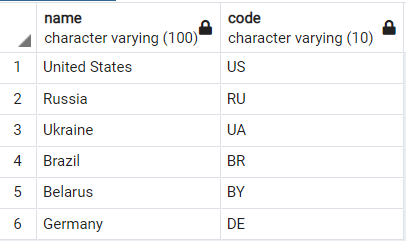

### Apps - Словарь приложений

In [14]:
CREATE TABLE apps (id INTEGER, name VARCHAR(50), platform VARCHAR(50));

INSERT INTO apps VALUES (226, 'Translate', 'Android');
INSERT INTO apps VALUES (229, 'Drawing', 'iOS');
INSERT INTO apps VALUES (230, 'Drawing', 'Android');
INSERT INTO apps VALUES (231, 'Writing', 'iOS');
INSERT INTO apps VALUES (232, 'Writing', 'Android');
INSERT INTO apps VALUES (233, 'Reading', 'iOS');
INSERT INTO apps VALUES (234, 'Reading', 'Android');
INSERT INTO apps VALUES (235, 'Learning', 'iOS');
INSERT INTO apps VALUES (236, 'Learning', 'Android');
INSERT INTO apps VALUES (237, 'Counting', 'iOS');
INSERT INTO apps VALUES (274, 'Translate', 'iOS');
INSERT INTO apps VALUES (321, 'Counting', 'Android');
INSERT INTO apps VALUES (397, 'Speaking', 'iOS');
INSERT INTO apps VALUES (568, 'Speaking', 'Android');
INSERT INTO apps VALUES (704, 'Smiling', 'iOS');

SELECT *
FROM apps
ORDER BY id, name;

SyntaxError: invalid syntax (<ipython-input-14-2a5d439fb73e>, line 1)

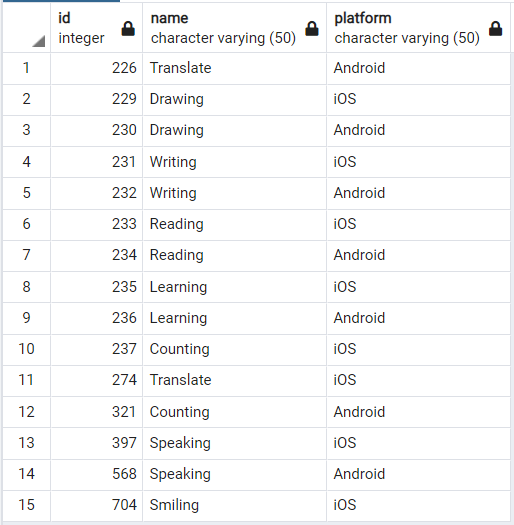

# Задание 1.1

Написать запрос для получения дохода за последние 30 дней, в разбивке по названию
приложения и стране.

### Пояснення від себе
Минулого разу використав `JOIN` замість `LEFT JOIN`.

In [15]:
SELECT a.name, country, SUM(revenue) AS sum_revenue
FROM main m
LEFT JOIN apps a
	ON m.app_id = a.id
WHERE date > (CURRENT_DATE - INTERVAL '30 days')
GROUP BY a.name, country
ORDER BY a.name, country;

SyntaxError: invalid syntax (<ipython-input-15-c2e1dbc6de2f>, line 1)

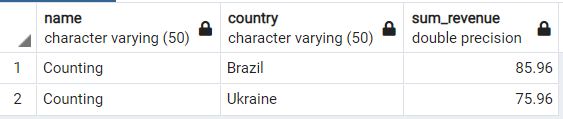

# Задание 1.2

Так как есть вероятность, из-за разных настроек телефонов, того что одна и та же страна
может иметь в данных несколько названий, нужно подменить полное название страны на
ее код. Для этого требуется написать запрос который создаст дубликат таблицы
main_data, с замененным столбцом country и агрегирован так чтобы каждая когорта была
представлена одной строкой (под когортой подразумевается уникальное сочетание app_id,
country_code, date).

### Пояснення від себе
Минулого разу використав `JOIN` замість `LEFT JOIN`.

In [16]:
CREATE TABLE main_data AS
SELECT app_id, 		
		countries.code AS country,
		date,
		SUM(installs) AS sum_installs,
		SUM(revenue) AS sum_revenue
FROM main
LEFT JOIN countries
	ON main.country = countries.name
GROUP BY app_id, countries.code, date
ORDER BY app_id, countries.code, date;

SELECT *
FROM main_data
ORDER BY app_id, country, date;

SyntaxError: invalid syntax (<ipython-input-16-6ca101831911>, line 1)

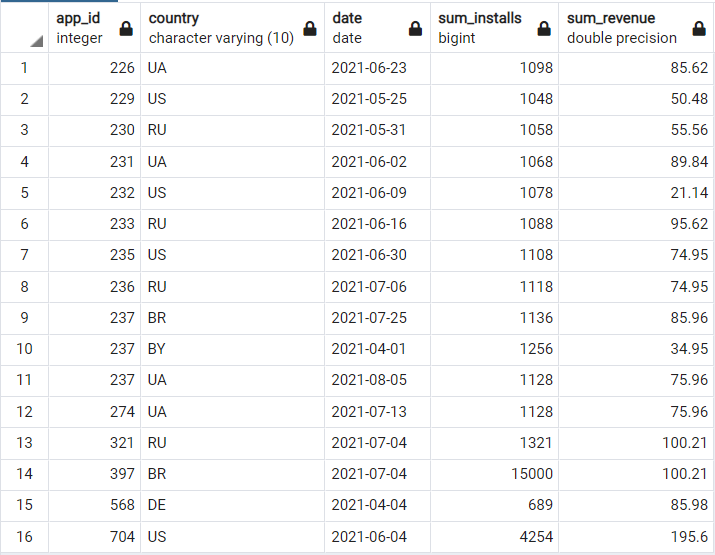

# Задание 1.3

Написать запрос который для каждой когорты и даты, будет рассчитывать долю дохода
данной когорты от всего дохода из страны когорты за соответствующий день и долю
дохода данной когорты от всего дохода из платформы (IOS/ANDROID) когорты за
соответствующий день.

In [17]:
SELECT m1.app_id,
		m1.date,
		m1.country,
		sum_revenue,
		sum_revenue/revenue_country_day AS cog_revenue_day,
		sum_revenue/platfrom_cog_revenue AS platf_cog_revenue_day
FROM main_data m1
LEFT JOIN
	(SELECT app_id,
	 	date,
	 	country,
	 	SUM(sum_revenue) AS revenue_country_day
	FROM main_data
	GROUP BY app_id, date, country) m2
ON m1.date = m2.date AND
	m1.country = m2.country AND
	m1.app_id = m2.app_id
LEFT JOIN
	(SELECT app_id, 
	 	country, 
	 	date,
	 	SUM(sum_revenue) AS platfrom_cog_revenue, 
	 	platform
	FROM main_data md
	LEFT JOIN apps a1
	ON md.app_id = a1.id
	GROUP BY app_id, country, date, platform) m3
ON m1.date = m3.date AND
	m1.country = m3.country AND
	m1.app_id = m3.app_id;

SyntaxError: invalid syntax (<ipython-input-17-04ea32382a7c>, line 1)

# Задание 1.4

Было обнаружено что app_id двух приложений перепутаны, поэтому требуется провести
замену app_id 226 на 274 и наоборот, замену требуется провести в main_data, с
перезаписью таблицы.

### Пояснення від себе
Була проблема, що використосував у якості тимчасової змінної числове значення (`226274`). І запит би не спрацював, якби такий app_id існував. Тому вирішив задачу через зміну типу даних і введенням тимчасової змінної `temp`.

До заміни

In [19]:
SELECT *
FROM main_data
ORDER BY app_id, country, date;

SyntaxError: invalid syntax (<ipython-input-19-43c38bae2259>, line 1)

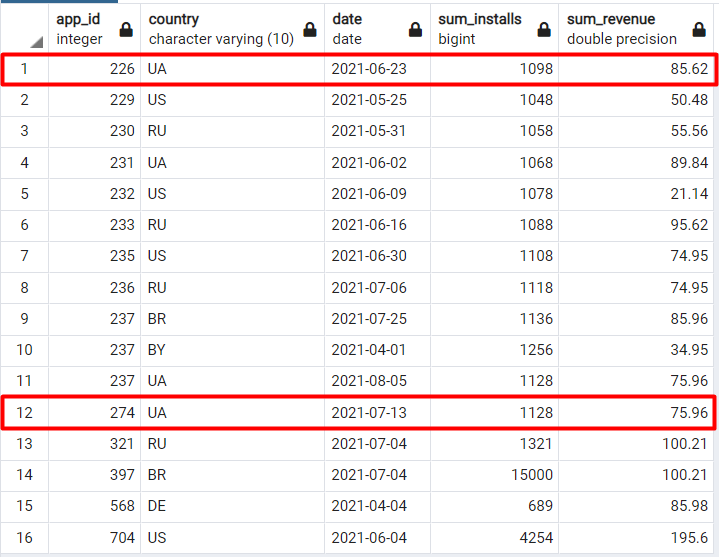

In [20]:
ALTER TABLE main_data
ALTER COLUMN app_id TYPE VARCHAR;

UPDATE main_data SET app_id = 'temp'
WHERE app_id = '226';
UPDATE main_data SET app_id = '226'
WHERE app_id = '274';
UPDATE main_data SET app_id = '274'
WHERE app_id = 'temp';

ALTER TABLE main_data
ALTER COLUMN app_id TYPE INT
USING app_id::integer;

SELECT *
FROM main_data
ORDER BY app_id, country, date;

SyntaxError: invalid syntax (<ipython-input-20-0b8b5b5450bf>, line 1)

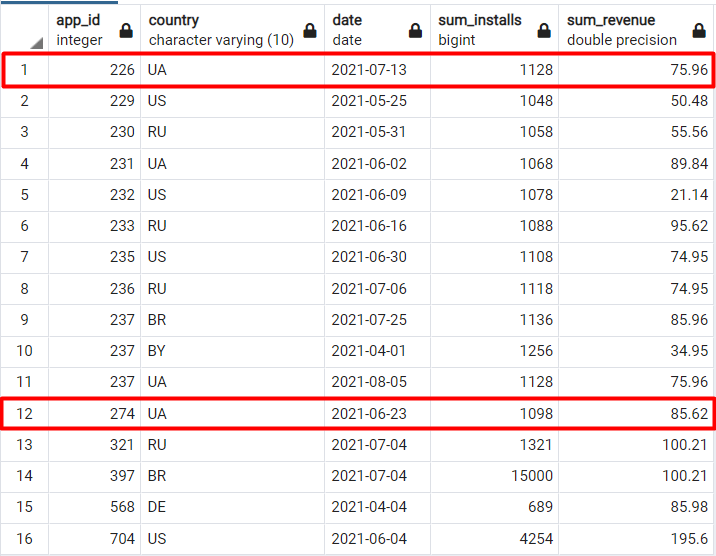

# Задание 1.5

Проагрегировать данные main_data по неделям (неделя начинается в понедельник и
заканчивается в воскресенье).

### Пояснення від себе
Була заувага щодо використаня `date_trunc`. Але він починає відлік з понеділка і повністю виконує умови задачі. Тому так само використав його.

In [23]:
SELECT date_trunc('week', date) AS week,
		app_id,
		country,
		SUM(sum_revenue) AS sum_revenue,
		SUM(sum_installs) as sum_installs
FROM main_data
GROUP BY week, app_id, country, sum_revenue, sum_installs
ORDER BY week, app_id, country;

SyntaxError: invalid syntax (<ipython-input-23-d46272a426b2>, line 1)

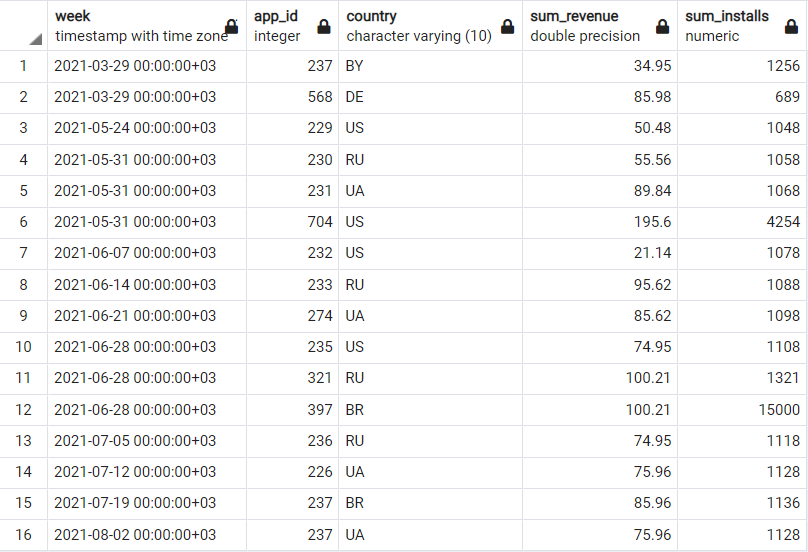

# Задание 1.6

Требуется в одной таблице собрать данные из таблицы main_data, по таким условиям:
- После 2021-05-01 для Украины, России и Беларуси на приложениях 229 и 321
- Между 2021-01-01 и 2021-07-04 в США для приложения 704
- Германия с 2021-01-01 и до последней пятницы в приложении 568
- Страна Бразилия приложение 397, если оба условия совпали то данные после
2021-05-01, если только одно из двух условий совпало то данные до 2021-04-30

### Пояснення від себе
Минулого разу не було рішення для визначення минулої п'ятниці у запиті №3. Нині використав `date_trunc('week', now()) - INTERVAL '3days'`.

У четвертому запиті минулого разу не прописав повністю, що буде після виконання умови (лише відбір дати, а потрібно було ще країну та/або додаток.

In [22]:
SELECT *
FROM main_data
WHERE date > '2021-05-21' AND
		(country = 'UA' OR country = 'RU' OR country = 'BY') AND
		(app_id = '229' OR app_id = '321')
UNION
SELECT *
FROM main_data
WHERE (date BETWEEN '2021-01-01' AND '2021-07-04') AND
		country = 'US' AND
		app_id = '704'
UNION
SELECT *
FROM main_data
WHERE (date BETWEEN '2021-01-01' AND (date_trunc('week', now()) - INTERVAL '3days')) AND
		country = 'DE' AND
		app_id = '568'
UNION
SELECT *
FROM main_data
WHERE
	CASE
		WHEN country = 'BR' AND app_id = '397' THEN country = 'BR' AND app_id = '397' AND date > '2021-05-21'
		WHEN country = 'BR' AND app_id != '397' THEN country = 'BR' AND date < '2021-04-30'
		WHEN country != 'BR' AND app_id = '397' THEN app_id = '397' AND date < '2021-04-30'
	END
ORDER BY app_id, country, date;

SyntaxError: invalid syntax (<ipython-input-22-62f33aa4e2cd>, line 1)

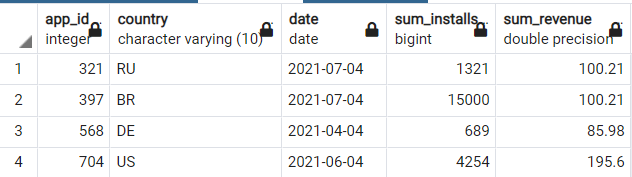